In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

%cd "C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking"
import polarisation_ray_transfer_matrix as rt
import particle_tracker as pt

C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking


In [2]:
N_V = 100
M_V = 2*N_V+1
ne_extent = 5.0e-3
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)

## Null
This sets up an empty density cube with no B field. We trace rays through here to use as the background shot for Faraday.

In [3]:
null = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = True, inv_brems = False, phaseshift = False, probing_direction = 'z')
n_e0 = 0
null.ne = np.zeros((M_V,M_V,M_V)) + n_e0

B = np.zeros((M_V,M_V,M_V,3))
null.external_B(B)

Ray trace completed in:	 108.3869981765747 s


<IPython.core.display.Javascript object>


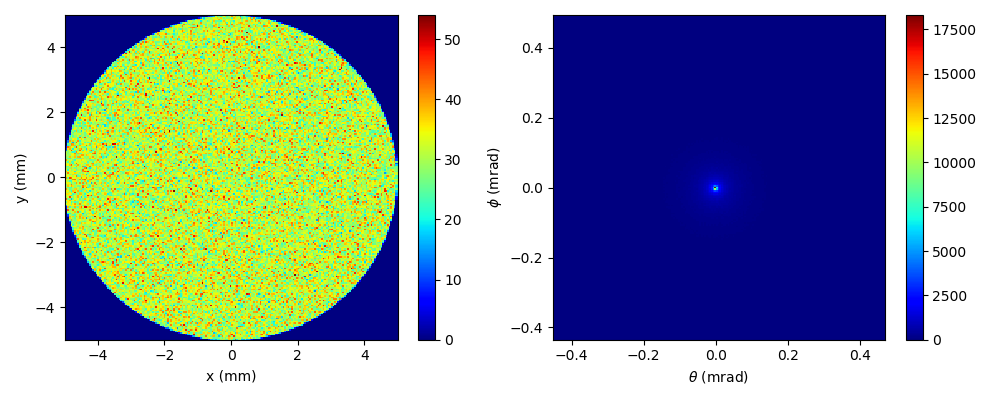

In [4]:
null.calc_dndr()
null.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
null.solve(s0)
rf = null.rf

## Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201

_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


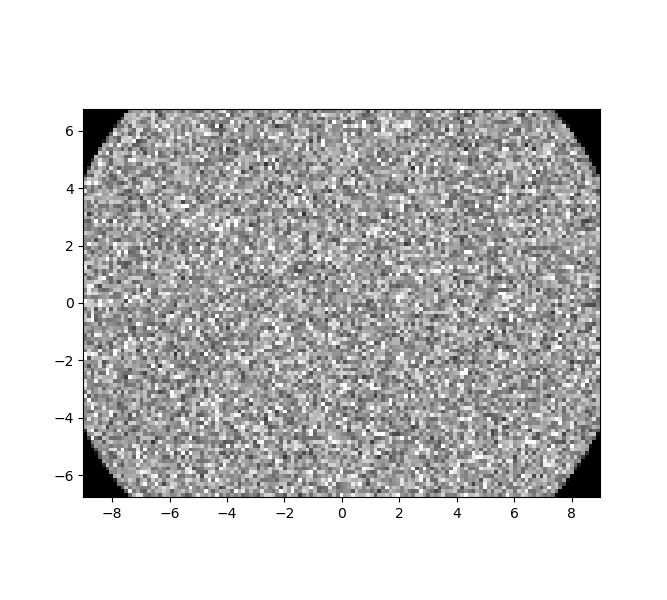

In [5]:
null.r0 = np.zeros((6, N_rays), dtype = 'complex')
null.r0[:4,:] = null.rf
null.r0[4:,:] = null.Jf
null.r0[0,:] *=1e3 #we use mm not m for the ray tracer
null.r0[2,:] *=1e3

sn = rt.Shadowgraphy(null.r0, L = 400, R = 25, object_length=5)
sn.solve()
sn.histogram(bin_scale = 25)
fig, axs = plt.subplots(figsize=(6.67, 6))

cm='gray'
clim=[0,5000]

sn.plot(axs, clim=clim, cmap=cm)

<IPython.core.display.Javascript object>


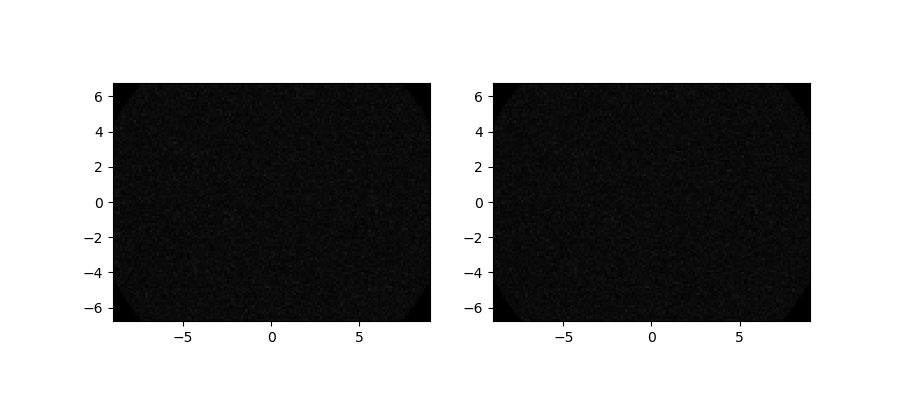

In [6]:
β = 3

f1n = rt.Faraday(null.r0, L = 400, R = 25, object_length=5)
f1n.solve(β = β)
f1n.histogram(bin_scale = 25)

f2n = rt.Faraday(null.r0, L = 400, R = 25, object_length=5)
f2n.solve(β = -β)
f2n.histogram(bin_scale = 25)

cm='gray'
clim=[0,200]

fig, axs = plt.subplots(1,2,figsize=(9, 4))
f1n.plot(axs[0], clim=clim, cmap=cm)
f2n.plot(axs[1], clim=clim, cmap=cm)

## Density gradient, fixed B

Ray trace completed in:	 383.34476828575134 s


<IPython.core.display.Javascript object>


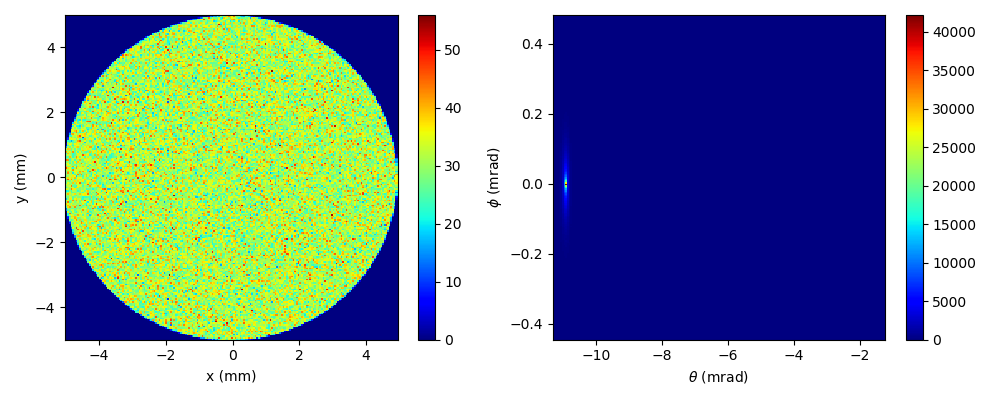

In [99]:
slab = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = True, inv_brems = False, phaseshift = False, probing_direction = 'z')
slab.test_slab(s=1, n_e0=1e25)
B = np.zeros((M_V,M_V,M_V,3)) + np.array([0,0,1])*4 # field in Z only
slab.external_B(B)

slab.calc_dndr()
slab.set_up_interps()


## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
slab.solve(s0)
rf = slab.rf

## Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201

_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

In [100]:
rf = np.zeros((6, N_rays), dtype = 'complex')
rf[:4,:] = slab.rf
rf[4:,:] = slab.Jf
rf[0,:] *=1e3 #we use mm not m for the ray tracer
rf[2,:] *=1e3

<IPython.core.display.Javascript object>


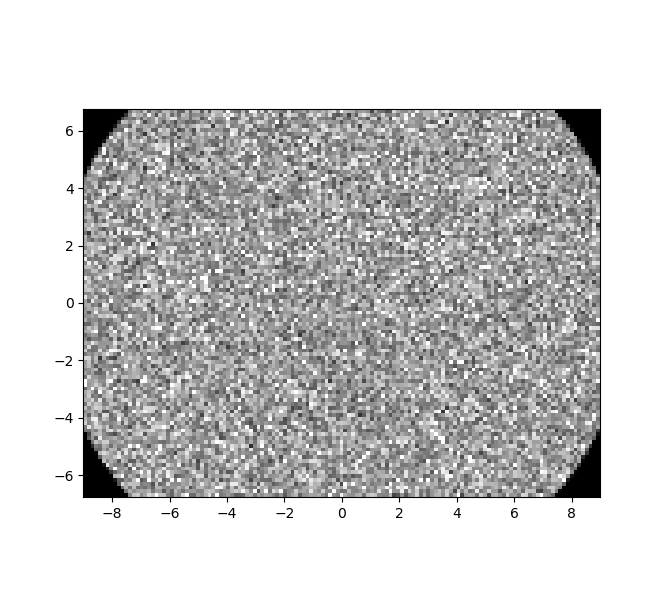

In [101]:
s = rt.Shadowgraphy(rf, L = 400, R = 25, object_length=5)
s.solve()
s.histogram(bin_scale = 25)
fig, axs = plt.subplots(figsize=(6.67, 6))

cm='gray'
clim=[0,5000]

s.plot(axs, clim=clim, cmap=cm)

<IPython.core.display.Javascript object>


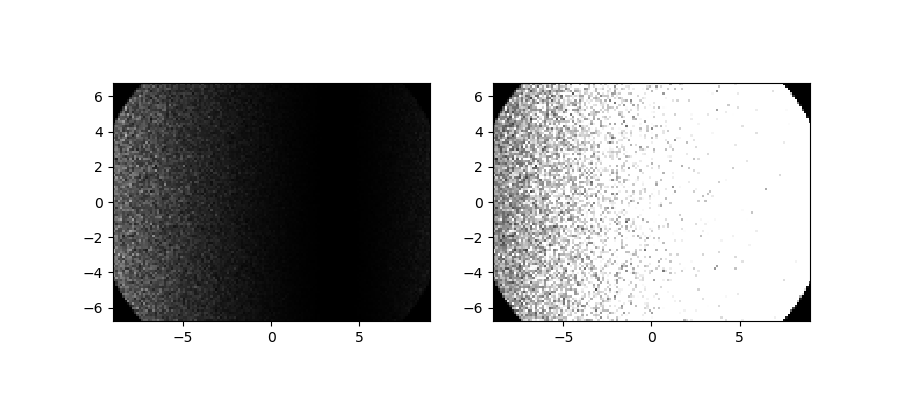

In [102]:
β = 10

f1 = rt.Faraday(rf, L = 400, R = 25, object_length=5)
f1.solve(β = β)
f1.histogram(bin_scale = 25)

f2 = rt.Faraday(rf, L = 400, R = 25, object_length=5)
f2.solve(β = -β)
f2.histogram(bin_scale = 25)

cm='gray'
clim=[0,200]

fig, axs = plt.subplots(1,2,figsize=(9, 4))
f1.plot(axs[0], clim=clim, cmap=cm)
f2.plot(axs[1], clim=clim, cmap=cm)

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


<IPython.core.display.Javascript object>


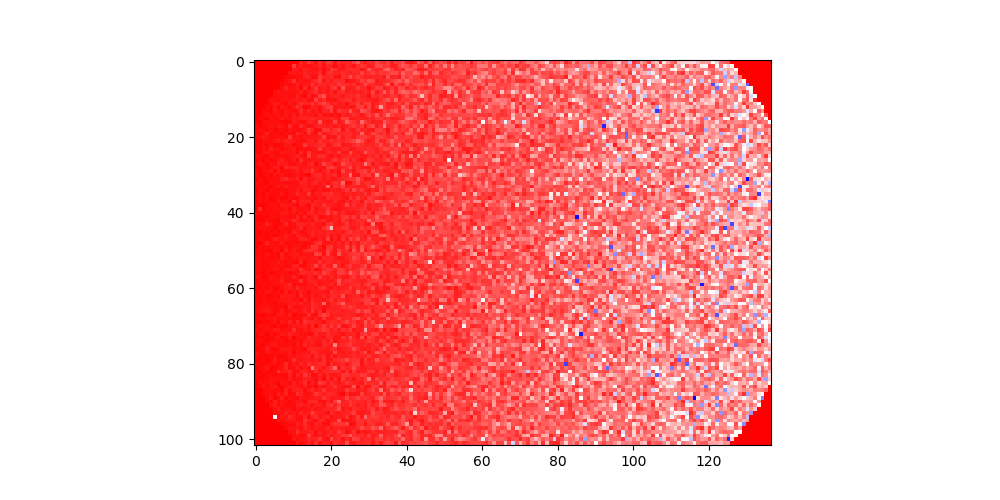

In [104]:
dd = 1e-6
N1 = f1.H/(f1n.H+dd)
N2 = f2.H/(f2n.H+dd)

D = N1-N2
α_meas = 180/np.pi* 0.5* np.arcsin(D*np.tan(β*np.pi/180/2))

fig, axs = plt.subplots(figsize = (10,5))
axs.imshow(α_meas, cmap = 'bwr')

In [105]:
B_z = slab.B[:,0,0,2]
n_e = slab.ne[:,0,0]
λ = 1e-6
α_pred = -2.62e-13*λ**2*B_z*n_e*2*ne_extent *180/np.pi
α_meas_lo = α_meas.mean(axis = 0)

<IPython.core.display.Javascript object>


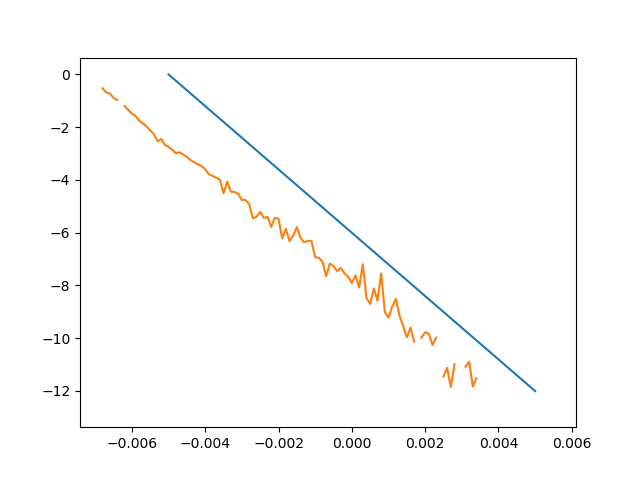

In [106]:
dx = ne_x[1]-ne_x[0]
Mag = 2
points = (α_meas_lo.shape[0]-1)/2
ne_x_cam = np.linspace(-Mag*dx*points, Mag*dx*points, α_meas_lo.shape[0])

fig, ax = plt.subplots()
ax.plot(ne_x, α_pred)
ax.plot(ne_x_cam,α_meas_lo)

## Reconnection - B only

In [107]:
B_only = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = True, inv_brems = False, phaseshift = False, probing_direction = 'z')
n_e0 = 1e25 
B_only.ne = np.zeros((M_V,M_V,M_V)) + n_e0

B_0 = 5
delta = 1e-3
B = np.zeros((M_V,M_V,M_V,3))
B[:,:,:,2] = B_0 * np.tanh(B_only.XX/delta)
B_only.external_B(B)

Ray trace completed in:	 770.7017531394958 s


<IPython.core.display.Javascript object>


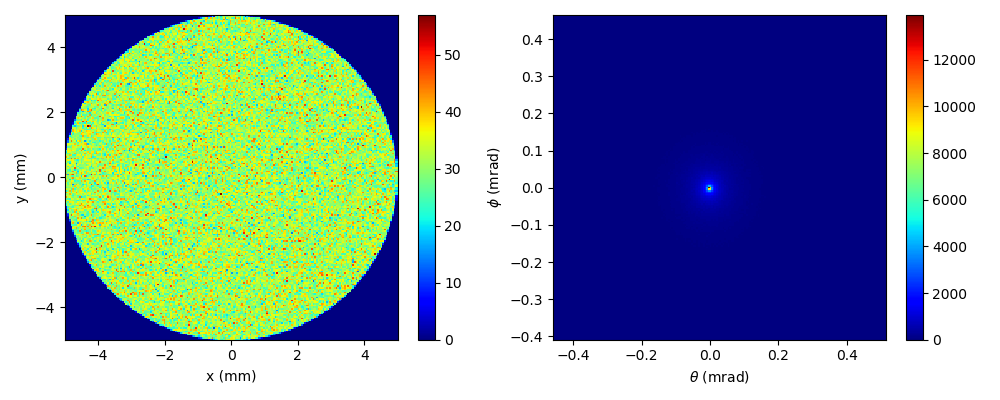

In [108]:
B_only.calc_dndr()
B_only.set_up_interps()


## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
B_only.solve(s0)
rf = B_only.rf

## Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201

_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


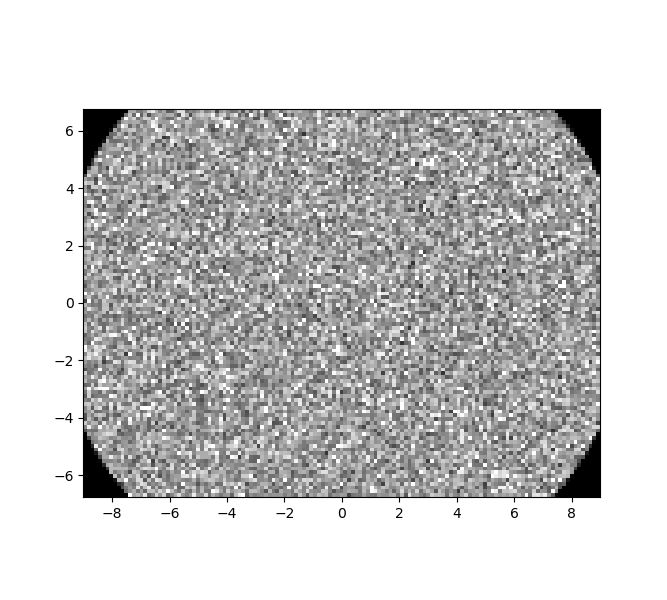

In [109]:
rf = np.zeros((6, N_rays), dtype = 'complex')
rf[:4,:] = B_only.rf
rf[4:,:] = B_only.Jf
rf[0,:] *=1e3 #we use mm not m for the ray tracer
rf[2,:] *=1e3

s = rt.Shadowgraphy(rf, L = 400, R = 25, object_length=5)
s.solve()
s.histogram(bin_scale = 25)
fig, axs = plt.subplots(figsize=(6.67, 6))

cm='gray'
clim=[0,5000]

s.plot(axs, clim=clim, cmap=cm)

<IPython.core.display.Javascript object>


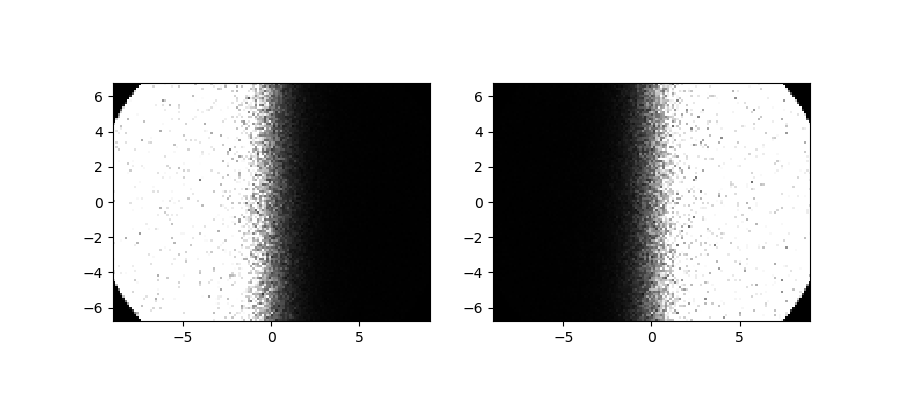

In [110]:
β = 10

f1 = rt.Faraday(rf, L = 400, R = 25, object_length=5)
f1.solve(β = β)
f1.histogram(bin_scale = 25)

f2 = rt.Faraday(rf, L = 400, R = 25, object_length=5)
f2.solve(β = -β)
f2.histogram(bin_scale = 25)

cm='gray'
clim=[0,200]

fig, axs = plt.subplots(1,2,figsize=(9, 4))
f1.plot(axs[0], clim=clim, cmap=cm)
f2.plot(axs[1], clim=clim, cmap=cm)

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


<IPython.core.display.Javascript object>


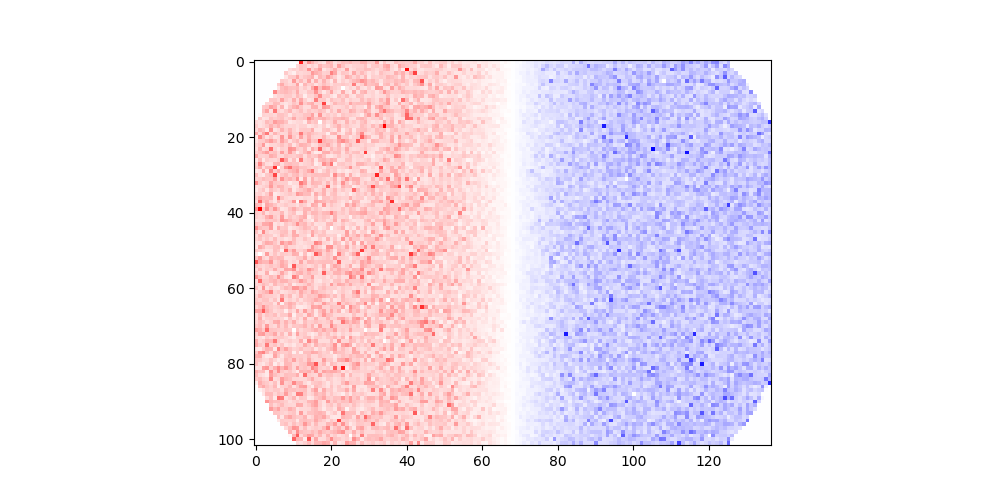

In [111]:
dd = 1e-6
N1 = f1.H/(f1n.H+dd)
N2 = f2.H/(f2n.H+dd)

D = N1-N2
α_meas = 180/np.pi* 0.5* np.arcsin(D*np.tan(β*np.pi/180/2))

fig, axs = plt.subplots(figsize = (10,5))
axs.imshow(α_meas, cmap = 'bwr')

In [118]:
B_z = B_only.B[:,0,0,2]
n_e = B_only.ne[:,0,0]
λ = 1.053e-6
α_pred = -2.62e-13*λ**2*B_z*n_e*(2*ne_extent) * (180/np.pi)
α_meas_lo = np.nanmean(α_meas, axis = 0)

<IPython.core.display.Javascript object>


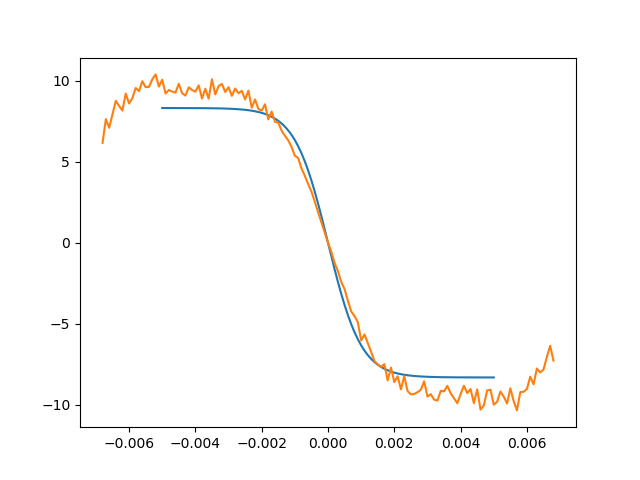

In [119]:
dx = ne_x[1]-ne_x[0]
Mag = 2
points = (α_meas_lo.shape[0]-1)/2
ne_x_cam = np.linspace(-Mag*dx*points, Mag*dx*points, α_meas_lo.shape[0])

fig, ax = plt.subplots()
ax.plot(ne_x, α_pred)
ax.plot(ne_x_cam,α_meas_lo)

## Reconnection n_e and B

In [7]:
rec = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = True, inv_brems = False, phaseshift = False, probing_direction = 'z')
delta = 1e-3
n_e0 = 1e24 
rec.ne = n_e0 * 1/(np.tanh(rec.XX/delta)**2 + 0.1)

B_0 = 5
B = np.zeros((M_V,M_V,M_V,3))
B[:,:,:,2] = B_0 * np.tanh(rec.XX/delta)
rec.external_B(B)

Ray trace completed in:	 380.36360144615173 s


<IPython.core.display.Javascript object>


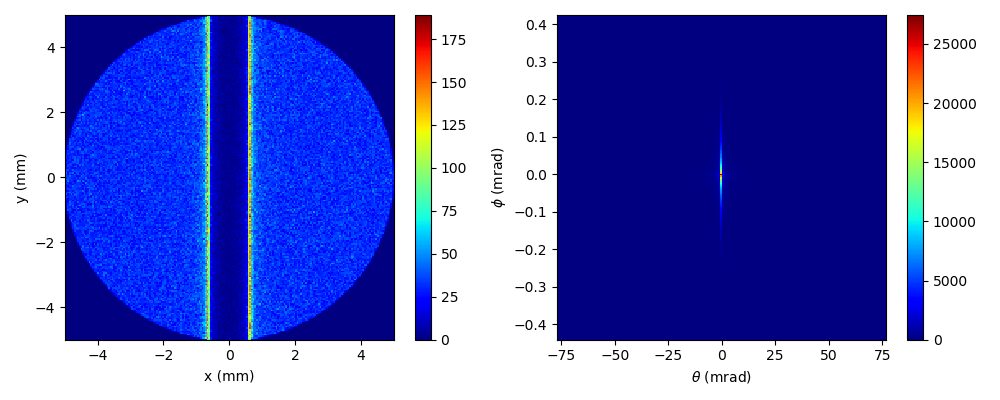

In [8]:
rec.calc_dndr()
rec.set_up_interps()


## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
rec.solve(s0)
rf = rec.rf

## Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201

_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking\polarisation_ray_transfer_matrix.py:101: RuntimeWarning: invalid value encountered in greater
  filt = rays[0,:]**2+rays[2,:]**2 > R**2


<IPython.core.display.Javascript object>


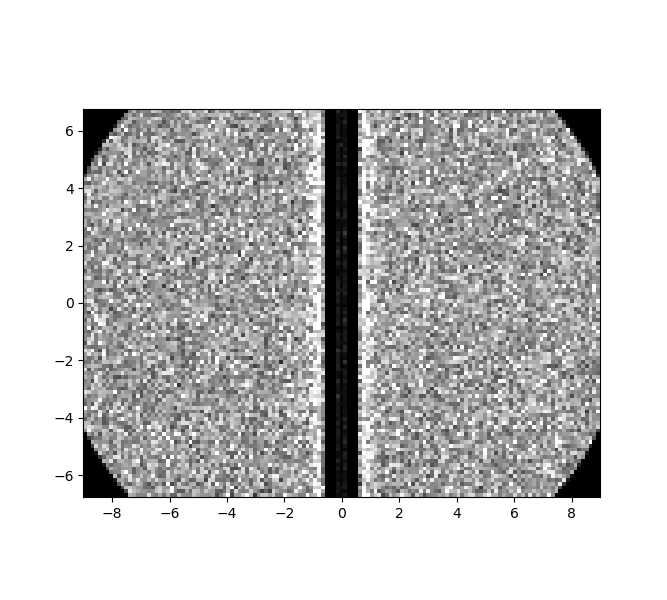

In [9]:
rec.r0 = np.zeros((6, N_rays), dtype = 'complex')
rec.r0[:4,:] = rec.rf
rec.r0[4:,:] = rec.Jf
rec.r0[0,:] *=1e3 #we use mm not m for the ray tracer
rec.r0[2,:] *=1e3

s = rt.Shadowgraphy(rec.r0, L = 400, R = 25, object_length=5)
s.solve()
s.histogram(bin_scale = 25)
fig, axs = plt.subplots(figsize=(6.67, 6))

cm='gray'
clim=[0,5000]

s.plot(axs, clim=clim, cmap=cm)

<IPython.core.display.Javascript object>


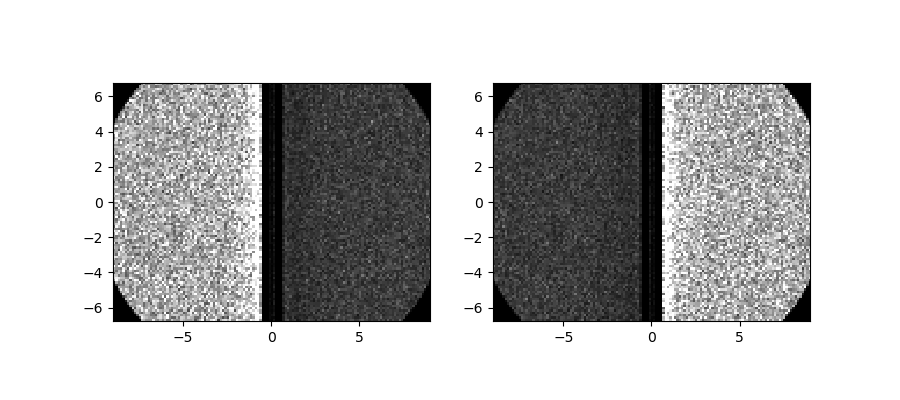

In [10]:
β = 3

f1 = rt.Faraday(rec.r0, L = 400, R = 25, object_length=5)
f1.solve(β = β)
f1.histogram(bin_scale = 25)

f2 = rt.Faraday(rec.r0, L = 400, R = 25, object_length=5)
f2.solve(β = -β)
f2.histogram(bin_scale = 25)

cm='gray'
clim=[0,20]

fig, axs = plt.subplots(1,2,figsize=(9, 4))
f1.plot(axs[0], clim=clim, cmap=cm)
f2.plot(axs[1], clim=clim, cmap=cm)

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


<IPython.core.display.Javascript object>


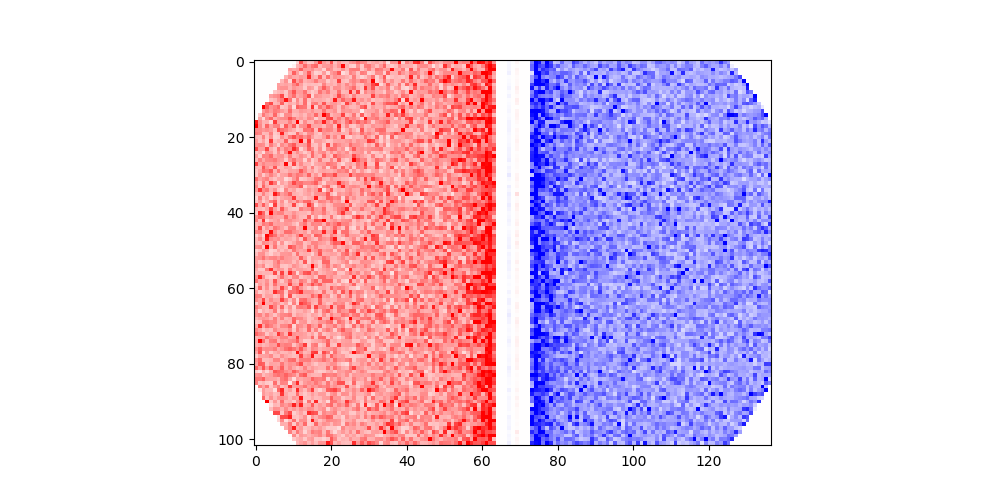

In [11]:
dd = 1e-6
N1 = f1.H/(f1n.H+dd)
N2 = f2.H/(f2n.H+dd)

D = N1-N2
α_meas = 180/np.pi* 0.5* np.arcsin(D*np.tan(β*np.pi/180/2))

fig, axs = plt.subplots(figsize = (10,5))
axs.imshow(α_meas, cmap = 'bwr', clim = [-2,2])

In [12]:
B_z = rec.B[:,0,0,2]
n_e = rec.ne[:,0,0]
λ = 1.053e-6
α_pred = -2.62e-13*λ**2*B_z*n_e*(2*ne_extent) * (180/np.pi)
α_meas_lo = np.nanmean(α_meas, axis = 0)

<IPython.core.display.Javascript object>


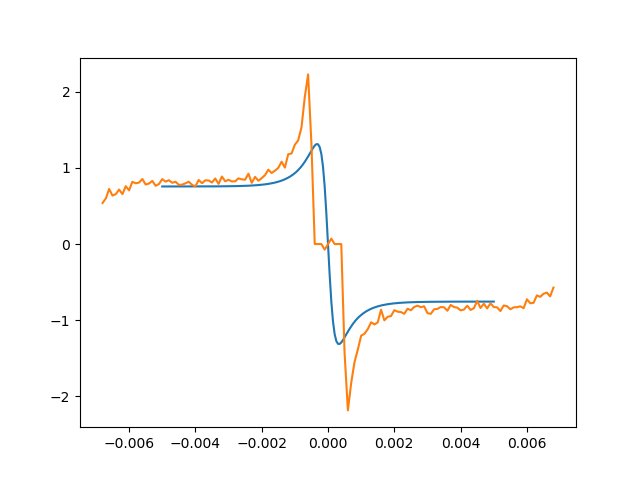

In [13]:
dx = ne_x[1]-ne_x[0]
Mag = 2
points = (α_meas_lo.shape[0]-1)/2
ne_x_cam = np.linspace(-Mag*dx*points, Mag*dx*points, α_meas_lo.shape[0])

fig, ax = plt.subplots()
ax.plot(ne_x, α_pred)
ax.plot(ne_x_cam,α_meas_lo)

In [16]:
n_e_interp = np.interp(ne_x_cam, ne_x, n_e)
B_meas = 3.83e12*(α_meas_lo*np.pi/180)/(λ**2*n_e_interp*2*ne_extent)

<IPython.core.display.Javascript object>


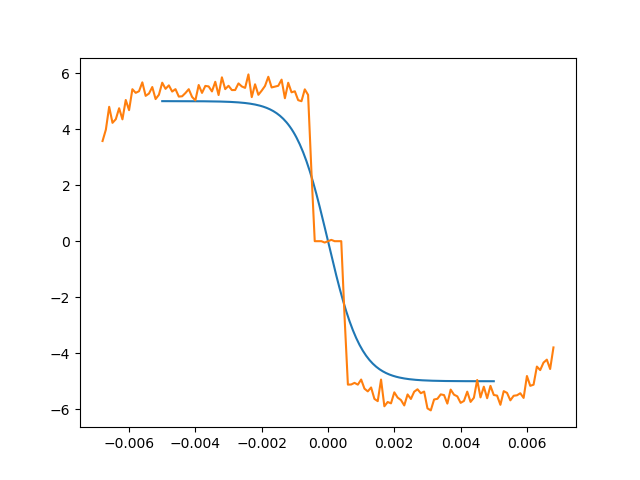

In [19]:
fig, ax = plt.subplots()
ax.plot(ne_x, -B_z)
ax.plot(ne_x_cam,B_meas)

<IPython.core.display.Javascript object>


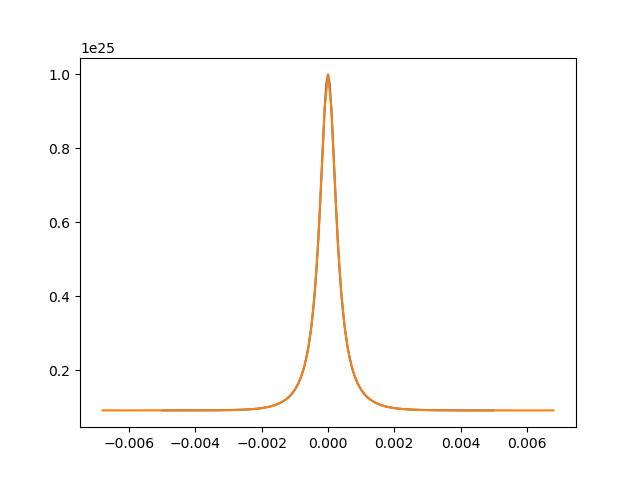

In [20]:
fig, ax = plt.subplots()
ax.plot(ne_x, n_e)
ax.plot(ne_x_cam,n_e_interp)

## Turbulent density

In [84]:
%cd "C:\Users\JHARE\Documents\GitHub\turbulence_tracing\gaussian_fields"
import turboGen as tg

C:\Users\JHARE\Documents\GitHub\turbulence_tracing\gaussian_fields


C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JHARE\Documents\GitHub\turbulence_tracing\gaussian_fields\turboGen.py:530: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(k_func(K)) # power spectra follows power law, so sqrt here.


<IPython.core.display.Javascript object>


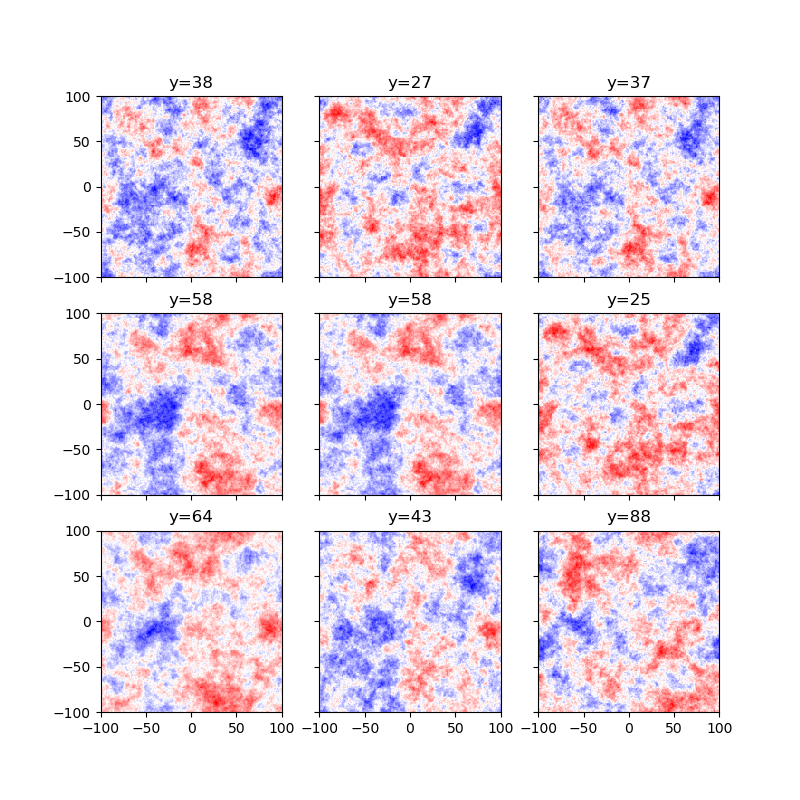

In [98]:
N = 100
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 11/3)        

sig = tg.gaussian3D_FFT(N, k41)

fig,ax=plt.subplots(3,3, figsize=(8,8), sharex=True, sharey=True)
ax=ax.flatten()

for a in ax:
    r=np.random.randint(0,N)
    d=sig[r,:,:]
    a.imshow(d, cmap='bwr', extent=[-N,N,-N,N])
    a.set_title("y="+str(r))

In [111]:
tur = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = True, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = tur
n_e0 = 1e25
δn_e = 100
r.ne = n_e0 * (1 + δn_e * sig)

B_0 = 5
B = np.zeros((M_V,M_V,M_V,3)) + np.array([0,0,1])*B_0 # field in Z only
r.external_B(B)

Ray trace completed in:	 530.7631878852844 s


<IPython.core.display.Javascript object>


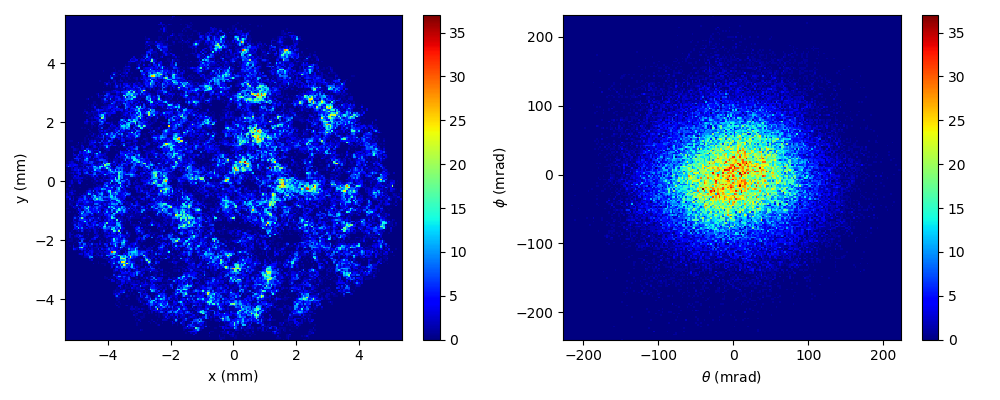

In [112]:
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e5)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201

_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


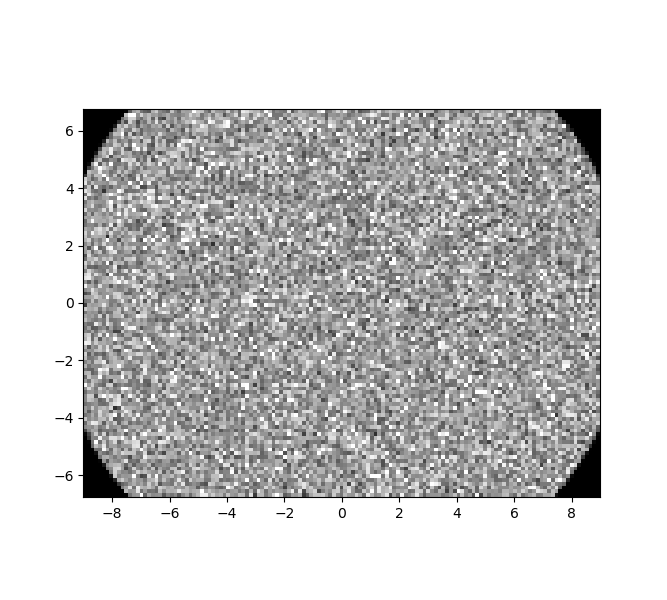

In [113]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

s = rt.Shadowgraphy(rec.r0, L = 400, R = 25, object_length=5)
s.solve()
s.histogram(bin_scale = 25)
fig, axs = plt.subplots(figsize=(6.67, 6))

cm='gray'
clim=[0,5000]

s.plot(axs, clim=clim, cmap=cm)

<IPython.core.display.Javascript object>


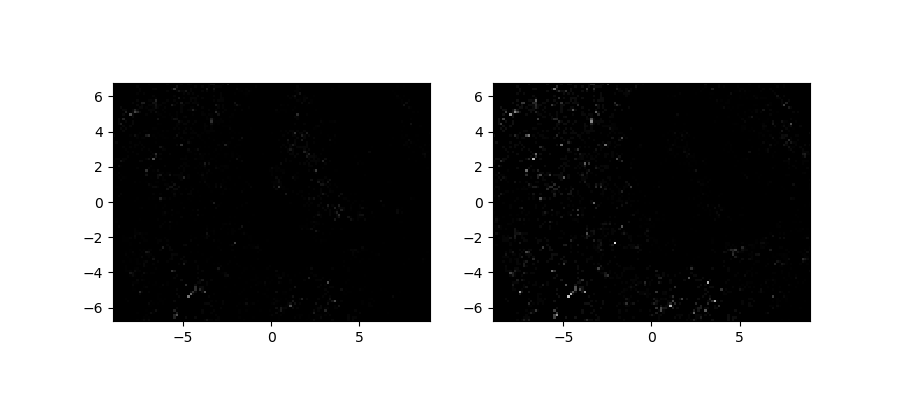

In [110]:
β = 3

f1 = rt.Faraday(r.r0, L = 400, R = 25, object_length=5)
f1.solve(β = β)
f1.histogram(bin_scale = 25)

f2 = rt.Faraday(r.r0, L = 400, R = 25, object_length=5)
f2.solve(β = -β)
f2.histogram(bin_scale = 25)

cm='gray'
clim=[0,2]

fig, axs = plt.subplots(1,2,figsize=(9, 4))
f1.plot(axs[0], clim=clim, cmap=cm)
f2.plot(axs[1], clim=clim, cmap=cm)

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


<IPython.core.display.Javascript object>


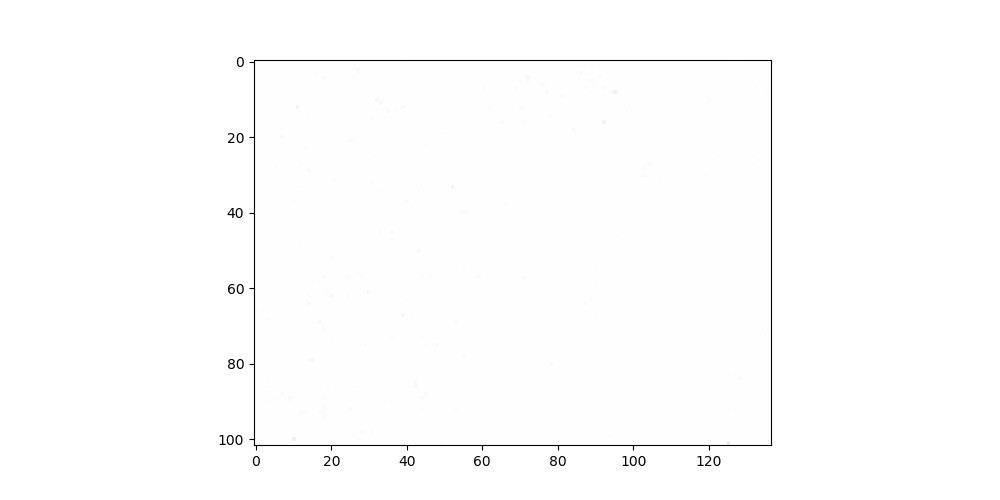

In [114]:
dd = 1e-6
N1 = f1.H/(f1n.H+dd)
N2 = f2.H/(f2n.H+dd)

D = N1-N2
α_meas = 180/np.pi* 0.5* np.arcsin(D*np.tan(β*np.pi/180/2))

fig, axs = plt.subplots(figsize = (10,5))
axs.imshow(α_meas, cmap = 'bwr', clim = [-2,2])